![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
# Importação de biblioteca
import pandas as pd
from joblib import load
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Importando dados de treino e test
link = "./../17_modulo/data/"

X_train = load(link+"X_train_df")
y_train = pd.DataFrame(load(link+"y_train_df"))
X_test = load(link+"X_test_df")
y_test = pd.DataFrame(load(link+"y_test_df"))

print(f"X_train:  {X_train.shape}")
print(f"y_train:  {y_train.shape}")
print(f"X_test:   {X_test.shape}")
print(f"y_test:   {y_test.shape}")

X_train:  (7352, 561)
y_train:  (7352, 1)
X_test:   (2210, 561)
y_test:   (2210, 1)


In [3]:
# Separando os bancos de treino e validação
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5514, 561)
(1838, 561)
(5514, 1)
(1838, 1)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [4]:
%%time

#  Instânciando Árvore de Descisão com ccp alpha 0.001
ccp_alpha = 0.001
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
clf

CPU times: total: 5.36 s
Wall time: 6.25 s


DecisionTreeClassifier(ccp_alpha=0.001, random_state=2360873)

In [5]:
# Analisando as métricas de acurácia no dataset de treino, teste e validação
acc_train = clf.score(X_train, y_train)
acc_valid = clf.score(X_valid, y_valid)
acc_teste = clf.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}%')
print(f'Acurácia da melhor árvore na base de validação: {acc_teste*100:.1f}%')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}%')

Acurácia da melhor árvore na base de treino:    91.5%
Acurácia da melhor árvore na base de validação: 71.1%
Acurácia da melhor árvore na base de teste:     71.1%


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [6]:
%%time

# Instânciando um dataset por PCA
prcomp = PCA().fit(X_train)

# Separando em treino, teste e validação
pc_treino = prcomp.transform(X_train)
pc_valida = prcomp.transform(X_valid)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

CPU times: total: 4.03 s
Wall time: 1.56 s


(5514, 561)

In [16]:
type(pc_teste)

numpy.ndarray

In [7]:
def testador_arvores(pc_treino, pc_valida, pc_teste, n) -> None:
    '''
        Função que determina Árvore de Descissão com dados recebidos, 
        de acordo com o número de variáveis indicado.
        :param pc_treino: Datasets de treino
        :param pc_valida: Datasets de validação
        :param pc_teste: Datasets de teste
        :return (list): Lista com os dados de acurácia
    '''
    # Nomes da colunas das dataframes
    colunas = ['cp'+str(x+1) for x in list(range(n))]

    # Seleciona o número de colunas e instância os datasets
    pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
    pc_valid = pd.DataFrame(pc_valida[:,:n], columns = colunas)
    pc_test  = pd.DataFrame(pc_teste[:,:n], columns = colunas)

    # Instância e treina a Árvore
    pc_clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)

    # Obtêm as acurácias nas bases de treino, teste e validação
    pc_acc_train = pc_clf.score(pc_train, y_train)
    pc_acc_valid = pc_clf.score(pc_valid, y_valid)
    pc_acc_teste = pc_clf.score(pc_test, y_test)

    # Imprime as acurácias das bases de treino, teste e validação
    print(f'Acurácia treino:    {pc_acc_train*100:.1f}%')
    print(f'Acurácia validação: {pc_acc_valid*100:.1f}%')
    print(f'Acurácia teste:     {pc_acc_teste*100:.1f}%')

    return [pc_acc_train, pc_acc_valid, pc_acc_teste]

In [8]:
%%time

# Obtêm as métricas usando 1 coluna
dados = {
    "pc_treino": pc_treino,
    "pc_valida": pc_valida,
    "pc_teste": pc_teste,
    "n": 1
}
metricas = {}
metricas["n_1"] = testador_arvores(**dados)

Acurácia treino:    45.1%
Acurácia validação: 43.4%
Acurácia teste:     40.9%
CPU times: total: 78.1 ms
Wall time: 70.3 ms


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [9]:
%%time

# Obtêm as métricas usando 2 colunas
dados["n"] =  2

metricas["n_2"] = testador_arvores(**dados)

Acurácia treino:    48.9%
Acurácia validação: 49.4%
Acurácia teste:     45.4%
CPU times: total: 78.1 ms
Wall time: 177 ms


In [10]:
%%time

# Obtêm as métricas usando 5 colunas
dados["n"] =  5

metricas["n_5"] = testador_arvores(**dados)

Acurácia treino:    57.8%
Acurácia validação: 53.5%
Acurácia teste:     49.0%
CPU times: total: 125 ms
Wall time: 121 ms


In [11]:
%%time

# Obtêm as métricas usando 10 colunas
dados["n"] =  10

metricas["n_10"] = testador_arvores(**dados)

Acurácia treino:    65.4%
Acurácia validação: 58.4%
Acurácia teste:     53.0%
CPU times: total: 203 ms
Wall time: 249 ms


In [12]:
%%time

# Obtêm as métricas usando 50 colunas
dados["n"] =  50

metricas["n_50"] = testador_arvores(**dados)

Acurácia treino:    73.5%
Acurácia validação: 59.1%
Acurácia teste:     55.0%
CPU times: total: 812 ms
Wall time: 1.15 s


In [13]:
# Instânciando DataFrame com o compliado de métricas
df_metricas = pd.DataFrame(metricas, index=['treino',"valid","test"]).T
df_metricas

,treino,valid,test
n_1,0.451215,0.433624,0.409050
n_2,0.488575,0.494015,0.454299
n_5,0.577983,0.534820,0.489593
n_10,0.653790,0.583787,0.530317
n_50,0.734675,0.590860,0.550226


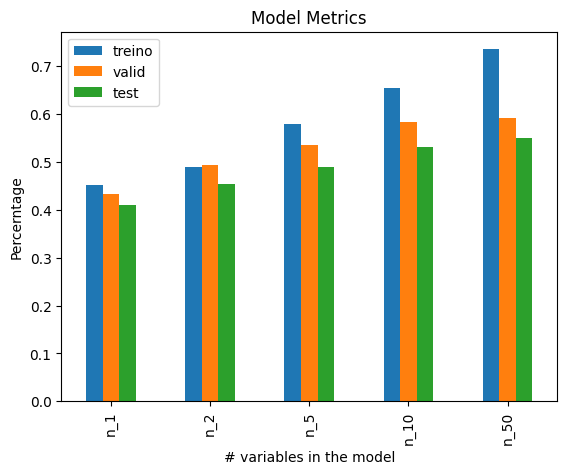

In [14]:
# Plotando o compliado de métricas por número de colunas
df_metricas.plot(kind="bar")
plt.title("Model Metrics")
plt.ylabel("Percerntage")
plt.xlabel("# variables in the model")
plt.show()

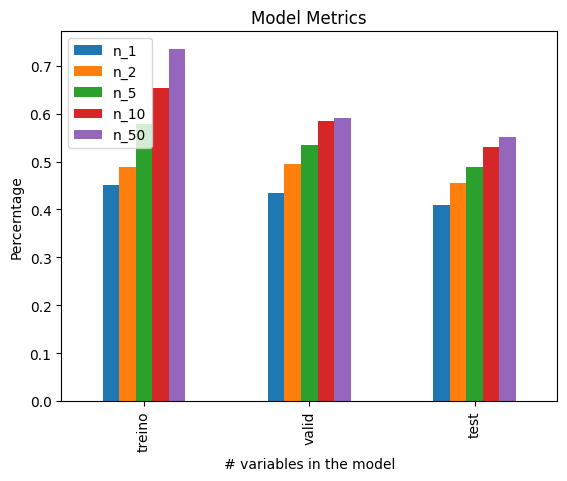

In [15]:
# Plotando o compliado de métricas por dataset
df_metricas.T.plot(kind="bar")
plt.title("Model Metrics")
plt.ylabel("Percerntage")
plt.xlabel("# variables in the model")
plt.show()

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

Podemos observar que com o maior número de variáveis, temos um ganho de acurária, porém, esse ganho é menor acima de 10 variáveis.
<br> 
Já o tempo de processamento é imversamente proporcional ao número de variáveis